In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('HealtyNormalized.csv')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

In [4]:
train = X_train
train

,vsH,vbH
1545950,0.000327,0.000465
842508,0.001032,0.000628
1689121,0.001009,-0.001388
1722866,0.000992,0.000238
1756169,0.000009,-0.000250
...,...,...
152315,0.000009,0.000726
963395,0.001020,0.000888
117952,0.000009,-0.000152
1484405,0.000008,-0.000348


In [5]:
test = X_test
test

,vsH,vbH
1563010,0.000009,0.000010
1144975,0.000725,0.000660
356424,0.000995,0.000173
247169,0.000009,-0.000022
1659074,0.001001,0.000010
...,...,...
1508691,0.000009,0.000823
167734,0.000009,0.000498
1374343,0.001003,-0.001258
384688,0.001022,0.000108


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train.shape

(1599954, 2)

In [8]:
test.shape

(399989, 2)

In [9]:
train = train.values.reshape(-1, 1, 2)

In [10]:
test  = test.values.reshape(-1, 1, 2)

In [11]:
#pip install keras
train.shape

(1599954, 1, 2)

In [12]:
test.shape

(399989, 1, 2)

In [13]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [14]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4480      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 2)              66        
Total params: 12,866
Trainable params: 12,866
Non-trainable params: 0
____________________________________________________

In [15]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Epoch 1/100
1440/1440 [==============================] - 7s 5ms/step - loss: 0.0350 - accuracy: 0.9476 - val_loss: 0.0037 - val_accuracy: 0.9973
Epoch 2/100
1440/1440 [==============================] - 6s 4ms/step - loss: 0.0072 - accuracy: 0.9947 - val_loss: 0.0026 - val_accuracy: 0.9975
Epoch 3/100
1440/1440 [==============================] - 6s 4ms/step - loss: 0.0049 - accuracy: 0.9949 - val_loss: 0.0018 - val_accuracy: 0.9982
Epoch 4/100
1440/1440 [==============================] - 6s 4ms/step - loss: 0.0041 - accuracy: 0.9933 - val_loss: 0.0013 - val_accuracy: 0.9990
Epoch 5/100
1440/1440 [==============================] - 7s 5ms/step - loss: 0.0039 - accuracy: 0.9928 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 6/100
1440/1440 [==============================] - 7s 5ms/step - loss: 0.0039 - accuracy: 0.9928 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 7/100
1440/1440 [==============================] - 8s 6ms/step - loss: 0.0038 - accuracy: 0.9929 - val_loss: 0.0019 - val_ac

1440/1440 [==============================] - 6s 4ms/step - loss: 0.0035 - accuracy: 0.9942 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 58/100
1440/1440 [==============================] - 7s 5ms/step - loss: 0.0035 - accuracy: 0.9941 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 59/100
1440/1440 [==============================] - 7s 5ms/step - loss: 0.0035 - accuracy: 0.9942 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 60/100
1440/1440 [==============================] - 7s 5ms/step - loss: 0.0035 - accuracy: 0.9942 - val_loss: 0.0018 - val_accuracy: 0.9998
Epoch 61/100
1440/1440 [==============================] - 7s 5ms/step - loss: 0.0035 - accuracy: 0.9941 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 62/100
1440/1440 [==============================] - 6s 4ms/step - loss: 0.0035 - accuracy: 0.9940 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 63/100
1440/1440 [==============================] - 6s 4ms/step - loss: 0.0035 - accuracy: 0.9942 - val_loss: 0.0018 - val_accuracy

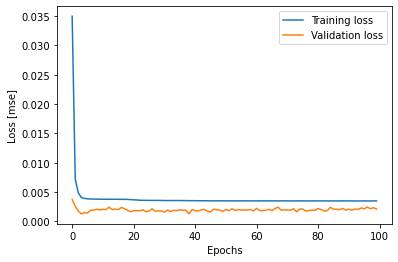

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

In [17]:
pred_train = model.predict(train)

In [18]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


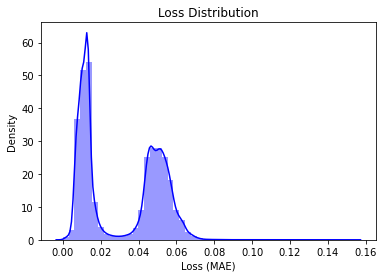

In [19]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [20]:
TH = 0.06
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [21]:
scored_train['Loss_mae'].mean()

0.03084403514321522

Text(0, 0.5, 'Loss (MAE)')

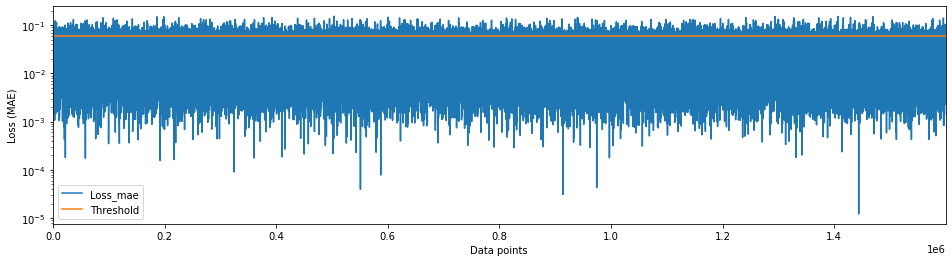

In [22]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [23]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.003687,0.06,False
1,0.057633,0.06,False
2,0.051598,0.06,False
3,0.042569,0.06,False
4,0.013193,0.06,False
...,...,...,...
1599949,0.012339,0.06,False
1599950,0.054127,0.06,False
1599951,0.012287,0.06,False
1599952,0.013183,0.06,False


In [24]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

         Loss_mae  Threshold  Anomaly
27       0.064069       0.06     True
34       0.069690       0.06     True
80       0.065741       0.06     True
106      0.066479       0.06     True
164      0.063139       0.06     True
...           ...        ...      ...
1599838  0.062134       0.06     True
1599843  0.061010       0.06     True
1599863  0.063919       0.06     True
1599905  0.062341       0.06     True
1599948  0.063046       0.06     True

[69184 rows x 3 columns]
(69184, 3)


C:\Users\bahma\.conda\envs\svm\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


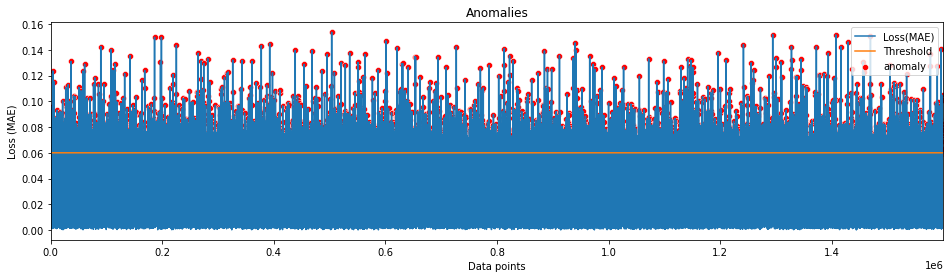

In [25]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [26]:
pred_test = model.predict(test)

In [27]:
score = model.evaluate(test,test)
score

12500/12500 [==============================] - 12s 921us/step - loss: 0.0021 - accuracy: 0.9995


[0.0021082099992781878, 0.999459981918335]

In [28]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


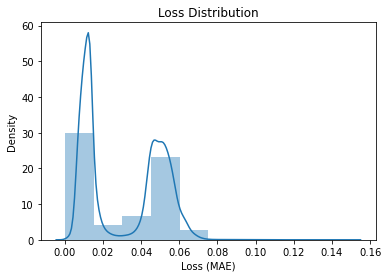

In [29]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [30]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.007300,0.06,False
1,0.015774,0.06,False
2,0.042072,0.06,False
3,0.008253,0.06,False
4,0.043318,0.06,False
...,...,...,...
399984,0.013759,0.06,False
399985,0.010419,0.06,False
399986,0.051438,0.06,False
399987,0.047746,0.06,False


In [31]:
scored_test['Loss_mae'].mean()

0.030776084338037416

Text(0, 0.5, 'Loss (MAE)')

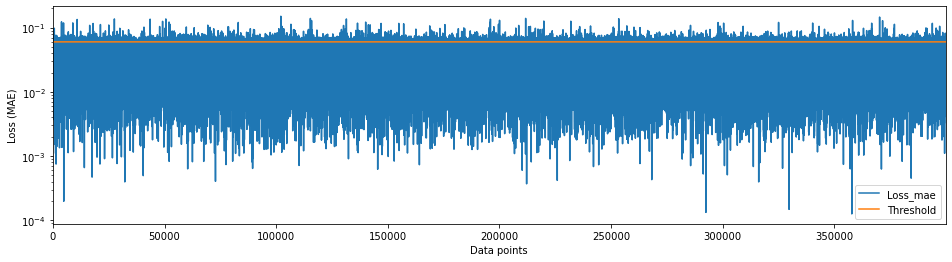

In [32]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [33]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

        Loss_mae  Threshold  Anomaly
9       0.063379       0.06     True
14      0.062465       0.06     True
52      0.072184       0.06     True
66      0.060411       0.06     True
70      0.060070       0.06     True
...          ...        ...      ...
399889  0.064876       0.06     True
399942  0.062655       0.06     True
399948  0.061208       0.06     True
399961  0.063807       0.06     True
399972  0.063484       0.06     True

[17119 rows x 3 columns]
(17119, 3)


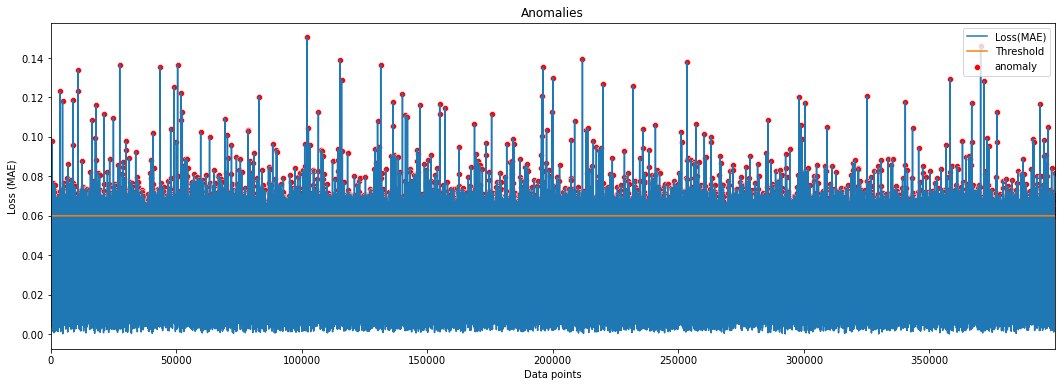

In [34]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [35]:
print(score[1])

0.999459981918335


In [36]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 99.95%


In [37]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 17119


In [38]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [39]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.007300,0.06,False
1,0.015774,0.06,False
2,0.042072,0.06,False
3,0.008253,0.06,False
4,0.043318,0.06,False
...,...,...,...
199990,0.047778,0.06,False
199991,0.049295,0.06,False
199992,0.010531,0.06,False
199993,0.007107,0.06,False


In [40]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
199995,0.046021,0.06,False
199996,0.007435,0.06,False
199997,0.012843,0.06,False
199998,0.050731,0.06,False
199999,0.044420,0.06,False
...,...,...,...
399984,0.013759,0.06,False
399985,0.010419,0.06,False
399986,0.051438,0.06,False
399987,0.047746,0.06,False


In [41]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = IR_test[IR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = IR_test[IR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 191431
False Positives: 8564
True Negatives: 8555
False Negatives: 191439


In [42]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 95.72%
Recall: 49.999%
F1 Score: 65.69%
Accuracy: 50.00%
